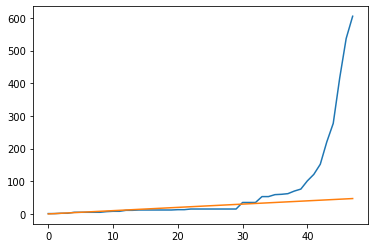

In [3]:
from pprint import pprint as pp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import Model
from lmfit.models import LinearModel
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib.etl import df_us
import lib.models as models

# Aggregated US data
_df = df_us.groupby('day').sum().reset_index()
_df = _df[['day', 'cases']]

model = LinearModel()
params = model.make_params()
result = model.fit(_df.day, params, x=_df.day.to_list())

# mpl.style.use('dark_background')
plt.plot(_df.day, _df.cases)
plt.plot(_df.day, result.best_fit)
plt.show()